In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random
import cv2

import tensorflow as tf
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

#Dataset

In [3]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raldolondono","key":"8633d7b658697ca55dfbdb9b875e08c3"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download ashishjangra27/face-mask-12k-images-dataset

 99% 328M/330M [00:15<00:00, 24.0MB/s]
100% 330M/330M [00:15<00:00, 22.8MB/s]


In [9]:
! unzip face-mask-12k-images-dataset.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/Wi

In [10]:
print(os.listdir("Face Mask Dataset/Train/"))
print(os.listdir("Face Mask Dataset/Validation/"))
print(os.listdir("Face Mask Dataset/Test/"))

['WithMask', 'WithoutMask']
['WithMask', 'WithoutMask']
['WithMask', 'WithoutMask']


In [11]:
# Number of images in the dataset

print('Images in the training dataset:\n')
print("Mask Images count - ", len(os.listdir("Face Mask Dataset/Train/WithMask")))
print("Non Mask Images count - ", len(os.listdir("Face Mask Dataset/Train/WithoutMask")))

Images in the training dataset:

Mask Images count -  5000
Non Mask Images count -  5000


In [12]:
train_dir = "Face Mask Dataset/Train/"
val_dir = "Face Mask Dataset/Validation/"
test_dir = "Face Mask Dataset/Test/"

In [13]:
print("Train Images count - ", len(os.listdir("Face Mask Dataset/Train/WithMask") + os.listdir("Face Mask Dataset/Train/WithoutMask")))
print("Validation Images count - ", len(os.listdir("Face Mask Dataset/Validation/WithMask") + os.listdir("Face Mask Dataset/Test/WithoutMask")))
print("Test Images count - ", len(os.listdir("Face Mask Dataset/Test/WithMask") + os.listdir("Face Mask Dataset/Validation/WithoutMask")))

Train Images count -  10000
Validation Images count -  909
Test Images count -  883


In [15]:
# Image data Generator
HEIGHT = 224
WEIGHT = 224
batch_size=64

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                         zoom_range=0.2,
                                         shear_range=0.2,
                                         rotation_range=0.2)

validation_datagen = ImageDataGenerator(rescale=1./255,
                                         zoom_range=0.2,
                                         shear_range=0.2,
                                        rotation_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(directory=train_dir,
                                          target_size=(HEIGHT,WEIGHT),
                                          class_mode="categorical",
                                          batch_size=batch_size
                                          )

val = validation_datagen.flow_from_directory(directory=val_dir,
                                            target_size=(HEIGHT,WEIGHT),
                                            class_mode="categorical",
                                            batch_size=batch_size)

test = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(HEIGHT,WEIGHT),
                                            class_mode="categorical",
                                            batch_size=batch_size)

print("Mask Images count - ", len(os.listdir("Face Mask Dataset/Train/WithMask")))
print("Non Mask Images count - ", len(os.listdir("Face Mask Dataset/Train/WithoutMask")))


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Mask Images count -  5000
Non Mask Images count -  5000


In [16]:
# Number of images in the dataset

print('Images in the training dataset:\n')
print("Mask Images count - ", len(os.listdir("Face Mask Dataset/Train/WithMask")))
print("Non Mask Images count - ", len(os.listdir("Face Mask Dataset/Train/WithoutMask")))

Images in the training dataset:

Mask Images count -  5000
Non Mask Images count -  5000


#Modelo

In [19]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(weights = "imagenet",include_top = False,input_shape=(224,224,3))

for layer in mobilenet.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Dropout
def model():
  modelo = Sequential()
  modelo.add(mobilenet)
  modelo.add(Dropout(0.5))
  modelo.add(Dense(300, activation="relu"))
  modelo.add(MaxPooling2D())
  modelo.add(Dense(100,activation='relu'))
  modelo.add(Flatten())
  modelo.add(Dense(2,activation="softmax"))

  return modelo

In [21]:
model=model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 dropout (Dropout)           (None, 7, 7, 1280)        0         
                                                                 
 dense (Dense)               (None, 7, 7, 300)         384300    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 300)        0         
 )                                                               
                                                                 
 dense_1 (Dense)             (None, 3, 3, 100)         30100     
                                                                 
 flatten (Flatten)           (None, 900)              

In [22]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [23]:
batch_size = 64
history = model.fit(train, validation_data=val, steps_per_epoch=len(train)//batch_size, epochs=200, validation_steps=len(val)//batch_size, verbose=1)

Epoch 1/200
2/2 [==============================] - 14s 1s/step - loss: 1.8920 - accuracy: 0.4688
Epoch 2/200
2/2 [==============================] - 2s 768ms/step - loss: 0.8310 - accuracy: 0.7656
Epoch 3/200
2/2 [==============================] - 2s 735ms/step - loss: 0.4306 - accuracy: 0.8750
Epoch 4/200
2/2 [==============================] - 1s 723ms/step - loss: 0.1634 - accuracy: 0.9375
Epoch 5/200
2/2 [==============================] - 1s 724ms/step - loss: 0.2313 - accuracy: 0.9062
Epoch 6/200
2/2 [==============================] - 2s 728ms/step - loss: 0.2378 - accuracy: 0.9609
Epoch 7/200
2/2 [==============================] - 1s 710ms/step - loss: 0.0493 - accuracy: 0.9844
Epoch 8/200
2/2 [==============================] - 2s 1s/step - loss: 0.0377 - accuracy: 0.9844
Epoch 9/200
2/2 [==============================] - 2s 755ms/step - loss: 0.1237 - accuracy: 0.9609
Epoch 10/200
2/2 [==============================] - 2s 765ms/step - loss: 0.0296 - accuracy: 0.9922
Epoch 11/200
2

In [24]:
loss, accuracy = model.evaluate(val)

13/13 [==============================] - 12s 791ms/step - loss: 0.0252 - accuracy: 0.9912


#Resultados

In [25]:
model.save('my_model.h5')

In [26]:
from tensorflow import keras

In [27]:
new_model = keras.models.load_model('my_model.h5')

In [28]:
loss, accuracy = new_model.evaluate(test)

16/16 [==============================] - 3s 161ms/step - loss: 0.0221 - accuracy: 0.9940


In [31]:
#test_names = sorted(test.class_indices.items(), key=lambda pair:pair[1])
class_names = sorted(test.class_indices.items(), key=lambda pair:pair[1])
#test_names = np.array(test.class_indices.items())
#test_names
print(class_names)

[('WithMask', 0), ('WithoutMask', 1)]


1/1 [==============================] - 0s 75ms/step
[[9.8514347e-04 9.9901485e-01]]
uint8


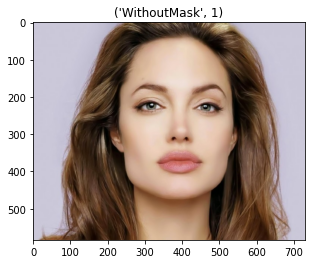

In [33]:
import cv2
import io
img=cv2.imread('/content/2.jpg')
img2=cv2.resize(img,(224,224))
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = np.reshape(img2,[1,224,224,3])
img2 = img2/255.0
prediction=model.predict(img2)
print(prediction)
plt.imshow(img_cvt)
print(img_cvt.dtype)
plt.title(class_names[np.argmax(prediction)])
plt.show()